In [1]:
import networkx as nx
import csv
import numpy as np
import pandas as pd
import pandas_profiling as pp
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm
import seaborn as sns#Plots

Load graph

In [2]:
training_set = []
G = nx.DiGraph()
with open("training.txt", "r") as f:
    for line in f:
        line = line.split()
        training_set.append(line)
        G.add_nodes_from(line[:2])
        if line[2]=='1':
            G.add_edge(line[0], line[1])
        
training_set = np.array(training_set)

## Number of followers per persons

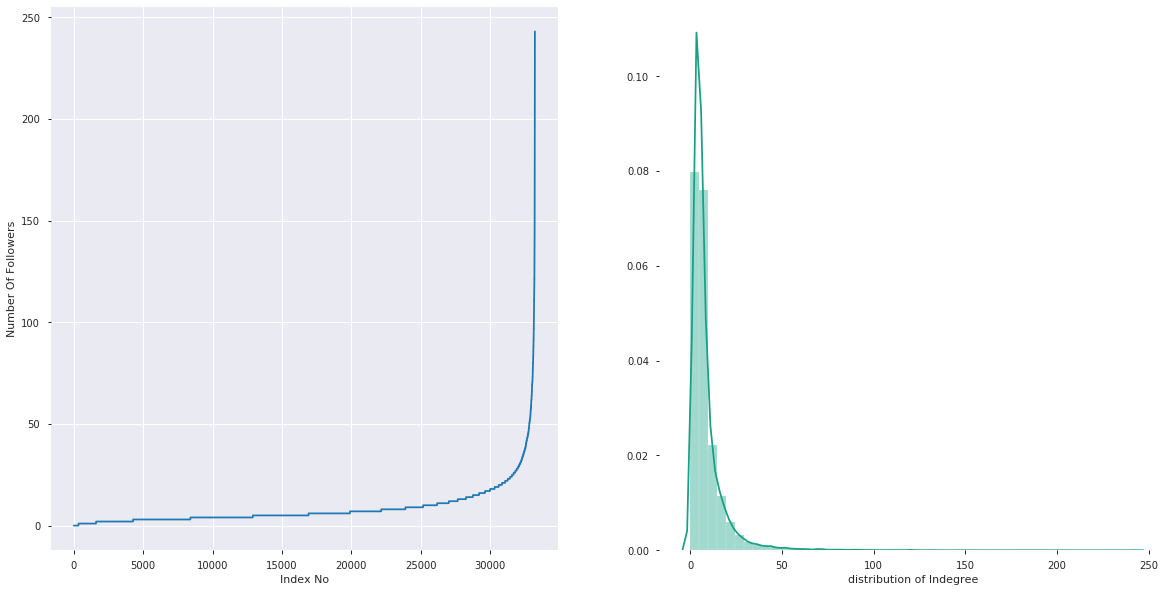

In [3]:
indegree_dist = list(dict(G.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('Number Of Followers')

sns.set_style('ticks')
plt.subplot(1,2,2)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('distribution of Indegree')
sns.despine()
plt.show()

In [5]:
for i in range(0,100):
    print(i,'percentile value is',np.percentile(indegree_dist,i))

0 percentile value is 0.0
1 percentile value is 0.0
2 percentile value is 1.0
3 percentile value is 1.0
4 percentile value is 1.0
5 percentile value is 2.0
6 percentile value is 2.0
7 percentile value is 2.0
8 percentile value is 2.0
9 percentile value is 2.0
10 percentile value is 2.0
11 percentile value is 2.0
12 percentile value is 2.0
13 percentile value is 3.0
14 percentile value is 3.0
15 percentile value is 3.0
16 percentile value is 3.0
17 percentile value is 3.0
18 percentile value is 3.0
19 percentile value is 3.0
20 percentile value is 3.0
21 percentile value is 3.0
22 percentile value is 3.0
23 percentile value is 3.0
24 percentile value is 3.0
25 percentile value is 3.0
26 percentile value is 4.0
27 percentile value is 4.0
28 percentile value is 4.0
29 percentile value is 4.0
30 percentile value is 4.0
31 percentile value is 4.0
32 percentile value is 4.0
33 percentile value is 4.0
34 percentile value is 4.0
35 percentile value is 4.0
36 percentile value is 4.0
37 percenti

In [11]:
testing_set = []
with open("/home/kanva/Workspace/3A/INF554-ML1/link-prediction-data-challenge-2019/testing.txt", "r") as f:
    for line in f:
        line = line.split()
        testing_set.append(line)
        
testing_set = np.array(testing_set)

In [17]:
def _short_path(G, nodes):
    has_removed=False
    a,b=nodes
    try:
        if G.has_edge(a,b):
            G.remove_edge(a,b)
            has_removed = True
            p= nx.shortest_path_length(G,source=a,target=b)
            G.add_edge(a,b)

            return p
        else:
            p= nx.shortest_path_length(G,source=a,target=b)
            return p
    except:
        if has_removed :
            G.add_edge(a,b)
        return -1

In [19]:
out_d = []
in_d = []
p = []
for i in range(testing_set.shape[0]):
    p.append(_short_path(G, testing_set[i]))
    out_d.append(G.out_degree(testing_set[i,0]))    
    in_d.append(G.in_degree(testing_set[i,0]))

In [24]:
sp = set(p)
{v: p.count(v) for v in sp}

{2: 29177,
 3: 23700,
 4: 2982,
 5: 1879,
 6: 590,
 7: 334,
 8: 143,
 9: 51,
 10: 33,
 11: 14,
 12: 7,
 13: 4,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 -1: 54532}

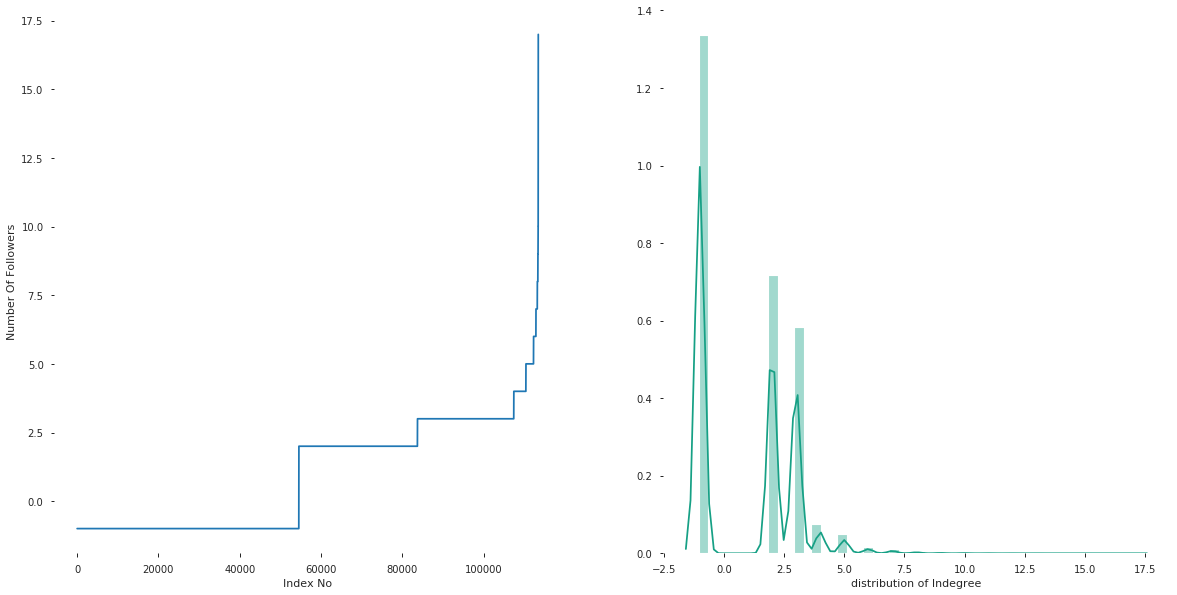

In [21]:
indegree_dist = p
indegree_dist.sort()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('Number Of Followers')

sns.set_style('ticks')
plt.subplot(1,2,2)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('distribution of Indegree')
sns.despine()
plt.show()

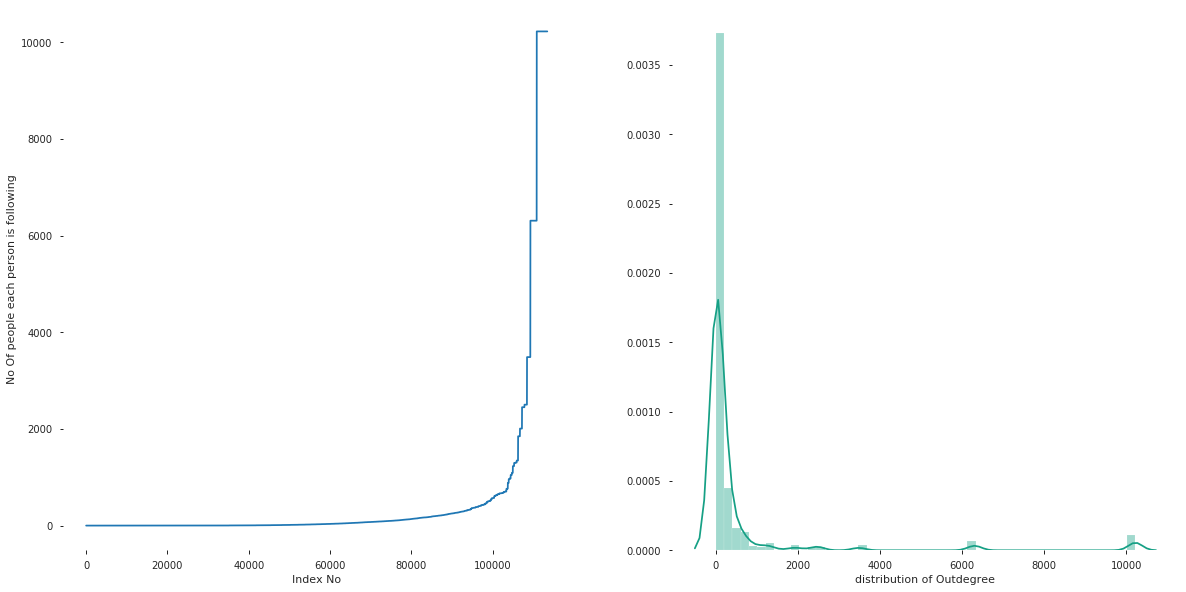

In [16]:
outdegree_dist = out_d
outdegree_dist.sort()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')

sns.set_style('ticks')
plt.subplot(1,2,2)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('distribution of Outdegree')
sns.despine()
plt.show()

## 1.2 No of people each person is following

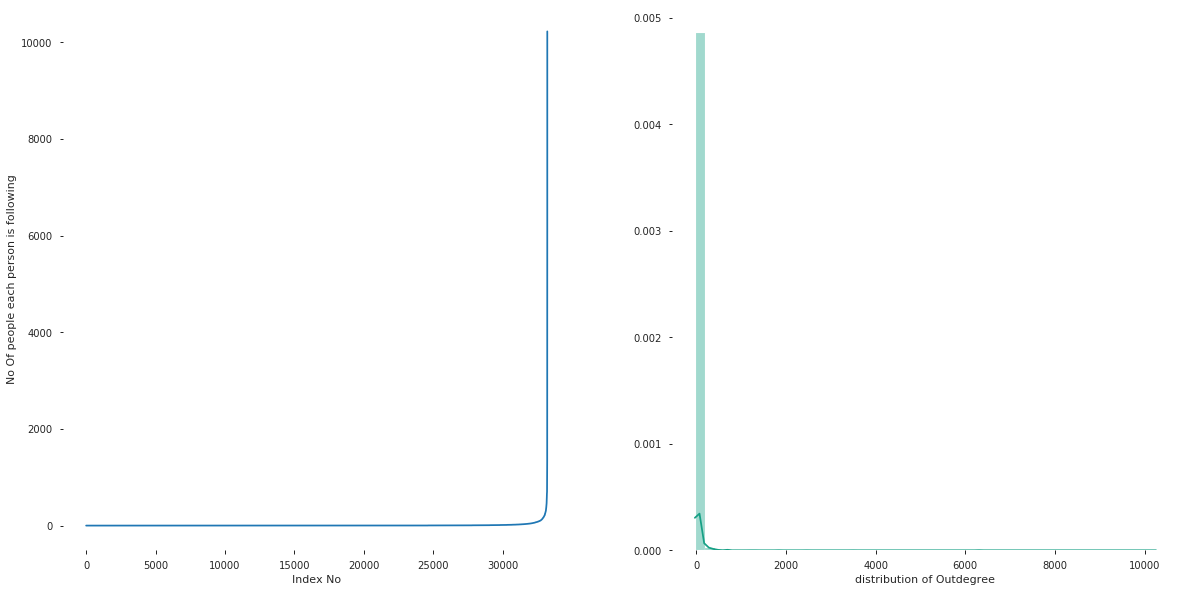

In [7]:
outdegree_dist = list(dict(G.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')

sns.set_style('ticks')
plt.subplot(1,2,2)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('distribution of Outdegree')
sns.despine()
plt.show()

In [8]:
### 90-100 percentile
for i in range(100):
    print(i,'percentile value is',np.percentile(outdegree_dist,i))

0 percentile value is 0.0
1 percentile value is 0.0
2 percentile value is 0.0
3 percentile value is 0.0
4 percentile value is 0.0
5 percentile value is 0.0
6 percentile value is 0.0
7 percentile value is 0.0
8 percentile value is 0.0
9 percentile value is 0.0
10 percentile value is 0.0
11 percentile value is 0.0
12 percentile value is 0.0
13 percentile value is 0.0
14 percentile value is 0.0
15 percentile value is 0.0
16 percentile value is 0.0
17 percentile value is 0.0
18 percentile value is 0.0
19 percentile value is 0.0
20 percentile value is 0.0
21 percentile value is 0.0
22 percentile value is 0.0
23 percentile value is 0.0
24 percentile value is 0.0
25 percentile value is 0.0
26 percentile value is 0.0
27 percentile value is 0.0
28 percentile value is 0.0
29 percentile value is 0.0
30 percentile value is 0.0
31 percentile value is 0.0
32 percentile value is 0.0
33 percentile value is 0.0
34 percentile value is 0.0
35 percentile value is 0.0
36 percentile value is 0.0
37 percenti

In [7]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 163.0
99.2 percentile value is 175.1999999999971
99.3 percentile value is 193.0
99.4 percentile value is 210.65000000000146
99.5 percentile value is 239.625
99.6 percentile value is 266.09999999999854
99.7 percentile value is 312.0
99.8 percentile value is 400.65000000000873
99.9 percentile value is 622.6250000000218
100.0 percentile value is 10224.0


In [8]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 17057 and % is 51.33630289532294


In [9]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 336 and % is 1.0112562451092517


In [3]:
D = dict(G.out_degree())
not_folw = []
for k,v in D.items():
    if v==0:
        not_folw.append(k)

In [4]:
D = dict(G.in_degree())
z_flw = []
for k,v in D.items():
    if v==0:
        z_flw.append(k)

In [8]:
L = list((set(not_folw) & set(z_flw) ))
len(L)
L

['25769',
 '21986',
 '33165',
 '33100',
 '30874',
 '27534',
 '30556',
 '25156',
 '10049',
 '20596',
 '33175',
 '30504',
 '17120',
 '26905',
 '30766',
 '28947',
 '27435',
 '31157',
 '25601',
 '22507',
 '31377',
 '21465',
 '32864',
 '25516',
 '12990',
 '31785',
 '30660',
 '28860',
 '25499',
 '30697',
 '28944',
 '27553',
 '28372',
 '5703',
 '23525',
 '2015',
 '23438',
 '28360',
 '26210',
 '28936',
 '28948',
 '28061',
 '23709',
 '28823',
 '33221',
 '32447',
 '26897',
 '30474',
 '25283',
 '29048',
 '33213',
 '27520',
 '24663',
 '32806',
 '31081',
 '33113',
 '31140',
 '30959',
 '29280',
 '33199',
 '31007',
 '32605',
 '31995',
 '30829']

In [27]:
nx.number_connected_components(G.to_undirected())

67

In [38]:
nodes = list(G.nodes())
len(nodes)

33226

In [37]:
cc = nx.node_connected_component(G.to_undirected(), nodes[0])
len(cc)

33158

In [42]:
dc = nx.degree_centrality(G)
dc

{'10481': 0.0036418359668924003,
 '5428': 0.0017456734386756961,
 '7353': 0.00018058690744920995,
 '30328': 0.00018058690744920995,
 '8627': 0.019112114371708053,
 '3547': 0.001143717080511663,
 '10232': 0.020586907449209935,
 '21925': 6.0195635816403313e-05,
 '7110': 0.0014446952595936796,
 '3288': 0.00039127163280662156,
 '6866': 9.029345372460498e-05,
 '9656': 0.00018058690744920995,
 '1317': 0.0013844996237772761,
 '1766': 0.0015650865312264862,
 '9458': 0.0013844996237772761,
 '15439': 0.00045146726862302486,
 '12447': 0.00030097817908201655,
 '21216': 0.0007223476297968398,
 '5832': 0.020887885628291948,
 '2363': 0.0002708803611738149,
 '24640': 0.00045146726862302486,
 '8893': 0.0003310759969902182,
 '981': 0.0043340857787810385,
 '9975': 0.0004815650865312265,
 '12410': 0.003009781790820166,
 '16669': 0.00012039127163280663,
 '26989': 0.0002708803611738149,
 '9242': 0.0004815650865312265,
 '32581': 0.00018058690744920995,
 '3257': 0.00039127163280662156,
 '31691': 0.00057185854

In [122]:
import operator
c = []
for i in range(50):
    n = max(dc.items(), key=operator.itemgetter(1))[0]
    c.append(n)
    dc[n]=-np.inf

In [124]:
d_c = [G.out_degree(c[i]) for i in range(len(c))]
d_c

[675,
 678,
 667,
 669,
 649,
 637,
 611,
 608,
 570,
 505,
 571,
 370,
 568,
 560,
 506,
 496,
 458,
 443,
 494,
 546,
 386,
 367,
 522,
 402,
 485,
 505,
 438,
 313,
 426,
 462,
 437,
 418,
 426,
 432,
 433,
 272,
 403,
 423,
 383,
 426,
 392,
 407,
 399,
 409,
 405,
 293,
 361,
 312,
 386,
 384]

In [69]:
nb_nodes = [int(200*d_c[i]/sum(d_c)) for i in range(len(c))]

In [77]:
from_c = [np.random.choice(list(G.neighbors(c[i])), nb_nodes[i]) for i in range(len(c))]

In [106]:
G2 = nx.DiGraph()
for i in range(len(c)):
    for v in from_c[i]:
        G2.add_edge(c[i], v)

In [107]:
g=G2.to_undirected()

In [128]:
wcc = list(nx.weakly_connected_components(G))

In [129]:
[len(u) for u in wcc]

[33158,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]